In [ ]:
PATH = r''
file_name = 'covid19_tweets_off.csv'
import os
os.chdir(PATH)

In [ ]:
%run setup.ipynb

In [3]:
df = pd.read_csv(f'{PATH}/{file_name}')
print(df.head())

                                                text
0  credit card spend decline enhance unemployment...
1  welcome back mota bhai home minister test nega...
2           govt suppose believe care health believe
3                  india home minister test negative
4                   one slipup western australia fkd


In [4]:
documents = df['text'].tolist()
print(documents[:5])

['credit card spend decline enhance unemployment benefit lapse', 'welcome back mota bhai home minister test negative curse hater flush away', 'govt suppose believe care health believe', 'india home minister test negative', 'one slipup western australia fkd']


In [5]:
tokenized_documents = [word_tokenize(document) for document in documents]

# Creation of the dictionary and corpus matrix
dictionary = corpora.Dictionary(tokenized_documents)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_documents]

tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]  # Map corpus object into tfidf space

In [10]:
num_topics_list = [5, 20, 40]
coherence_scores = []

best_coherence = float('inf')
best_model = None

for num_topics in num_topics_list:
    lsa_model = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=num_topics)
    
    coherence_model = CoherenceModel(model=lsa_model, corpus=corpus_tfidf, dictionary=dictionary, coherence='u_mass')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)
    
    if coherence_score < best_coherence:
        best_coherence = coherence_score
        best_model = lsa_model

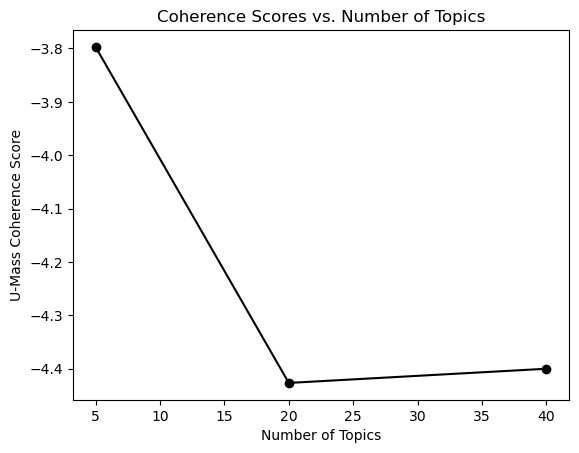

In [11]:
plt.plot(num_topics_list, coherence_scores, marker='o', linestyle='-', color='black')
plt.title('Coherence Scores vs. Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('U-Mass Coherence Score')
plt.show()

In [15]:
print(f'The best coherence score achieved by the model optimized for the number of topics is:: {best_coherence}')

The best coherence score achieved by the model optimized for the number of topics is:: -4.426517246968264


In [13]:
topics = best_model.print_topics()

# Extract the first 5 keywords and their weights from the topic text
def simplify_topic_representation(topic):
    words_with_weights = [word.split("*") for word in topic.split(" + ")]
    simplified_words = [word[1][1:-1] for word in words_with_weights[:5]]
    return ", ".join(simplified_words)

simplified_topics = [(topic[0], simplify_topic_representation(topic[1])) for topic in topics]

for topic_id, top_words in simplified_topics:
    print(f"Topic {topic_id}: {top_words}")

Topic 0: case, new, death, report, total
Topic 1: people, case, mask, get, wear
Topic 2: test, positive, mask, wear, new
Topic 3: mask, wear, test, positive, pandemic
Topic 4: death, new, people, die, toll
Topic 5: people, amp, death, die, case
Topic 6: day, new, amp, death, case
Topic 7: amp, death, new, case, get
Topic 8: get, total, day, people, new
Topic 9: amp, pandemic, get, day, global
Topic 10: need, hour, last, amp, today
Topic 11: vaccine, say, need, day, first
Topic 12: pandemic, need, day, vaccine, school
Topic 13: get, not, can, pandemic, school
Topic 14: not, can, report, take, today
Topic 15: school, report, one, day, today
Topic 16: school, can, not, report, take
Topic 17: pandemic, health, know, take, stay
Topic 18: health, say, one, vaccine, school
Topic 19: one, know, like, stay, home


In [14]:
df_coherence = pd.DataFrame(coherence_scores).assign(Topics = [5,20,40]).reset_index().rename(columns = {0: "Coherence"})
df_coherence = df_coherence[["Topics","Coherence"]]
df_coherence.to_csv("coherence_lsa.csv")
df_coherence

,Topics,Coherence
0,5,-3.797175
1,20,-4.426517
2,40,-4.399953
